# Image and Video Binarization</font>

In order to reach our goal of **baby-foot ball detection** <font size='2'>&#x26BD;</font> that will lead us, for later, to count the goals scored in our video, here are the main steps:

* <font size='2'>1️⃣</font> Detecting the ball
* <font size='2'>2️⃣</font> Detecting the goal cages
* <font size='2'>3️⃣</font> Counting goals when the ball reaches the goal cages

The **[image segmentation](https://en.wikipedia.org/wiki/Image_segmentation)** is a very important task for the ``ball`` and the ``goal cages`` ``detections``. <font size='5' color="green">🥅__<font size='2'>⚽</font>__🥅</font>

In this notebook, we will learn basic notions on how to segment the frames of our video in order to simplify our image so we can later dectect the ball.

### <font color="dodgerblue">Useful imports</font>

For this session we will still use most of the libraries that we saw in the previous notebook such as <font size='2'>📚</font> [numpy](https://numpy.org/), <font size='2'>📚</font> [skimage](https://scikit-image.org/), <font size='2'>📚</font> [matplotlib](https://matplotlib.org/) and also the function <font size='2'>⚙</font> **[play_video(...)](functions/play_video.ipynb)** for the video preview.

Let's say that those are the fundamental libraries that we will import in the cell bellow but they are not enough to do fancy things.

<font size='5'>&#x26A0;</font> For now on, when we need a specific library or module that is not included in the cell bellow, we will import them progressively in the notebook so be aware of that. <font size='2'>🚨</font>

In order to load a video into memory, we still need <font size='2'>📚</font> [imageio](https://imageio.readthedocs.io/en/stable/) but for this notebook, we will use the crafted function <font size='2'>⚙</font> **[get_video_frames_from(...)](functions/get_video_frames_from.html)** while <font size='2'>⚙</font> **[treat_video(...)](functions/treat_video.html)** will be used later for our video segmentation task.

In [1]:
# imports managing paths
from glob import glob
import os.path

# import about matrix
import numpy as np

# imports about managing images and videos
import skimage as ski
import skimage.io as io

# import for displaying image and videos
import matplotlib.pyplot as plt

# other imports
%run functions/get_video_frames_from.ipynb # loading a video and returns a list of frames
%run functions/play_video.ipynb # play_video(video_frames, interval, show_axis='on')-->plt_vid
%run functions/treat_video.ipynb # treat_video(frames, threshold, our_func)-->treated_frames array

## <font color="dodgerblue">1. Image Binarization</font> <font size='4'>🏞</font>

In the field of [image processing](https://en.wikipedia.org/wiki/Digital_image_processing), **[image segmentation](https://en.wikipedia.org/wiki/Image_segmentation)** is a process aiming to highlight relevant objects of interest contained in an image.

It is a very important step leading to a simplification of the content of the image.
Indeed, an image may contain tons of information but we usually only need some parts of it to achieve a specific goal (e.g. detecting a tumor in medical images, detecting only buildings in a satellite image, detecting the roads in the case of autonomous driving,...).

The segmentation process tends to regroup the pixels having same ``characteristics`` (e.g. color, shape, size,...).
Those groups of pixels often represent the ``object of interests`` that can also be called ``regions`` of the image.

In our case of **baby-football ball detection**, we would like to only keep the pixels representing the ``ball`` and drop the remaining ones as the example bellow.

<table>
    <tr>
        <td><b>Color image (RGB image)</b></td>
        <td><b>Grayscale image (grayscale image)</b></td>        
        <td><b>Whished Segmented image (binary image)</b></td>
    </tr>
    <tr>
        <td><img src="figs/eg_image_1.png" width=500/></td>
        <td><img src="figs/eg_gray_1.png" width=500/></td>
        <td><img src="figs/eg_seg_image_1.png" width=500/></td>
    </tr>
</table>

<font size='5'>&#x26A0;</font> As you noticed, at the end of the segmentation process, we get a ``binary image`` (remember it? <font size='5'>🤔</font>) where the ``objects`` are in ``white`` ⬜ and the ``background``,i.e. the not interesting part of the image, is in ``black`` ⬛.



Detecting the ball in our images is a crucial task bringing us closer to our final goal.
If we manage to segment our image correctly and getting ``binary images`` such as in the example above, we could then have a chance to follow its movements.

<font color="dodgerblue">**Where to start?**</font> <font size='5'>❓</font>

From the example above, we have first a ``color image`` transformed into a ``grayscale image`` from which we get a ``binary image`` after the ``segmentation process``.

The easiest way to work on an image is to work on its ``grayscale`` version.
Indeed, remember that a once loaded in the memory, the ``grayscale image`` is represented by only one ``matrix`` since the ``color image`` could be represented by many (3 channels so 3 matrices for an RGB image).

Working on ``color images`` could be interesting but it is greatly challenging for now and many research works in the field of image processing are dedicated to it.

Yet [color image segmentation](https://www.sciencedirect.com/science/article/abs/pii/S0031320300001497) is still possible and interesting, let's start from the basics with the ``graysclase image segmentation``.

### <font color="dodgerblue">1.1. Preprocessing</font>

The [preprocessing](https://en.wikipedia.org/wiki/Data_preprocessing) step is an important task.
Indeed, we should first must ensure that our data, i.e. image, is well prepared for the next steps.

As our video is colored, we have ``RGB color images`` in our list of images that we named here ``video_frames``.
We have then to transform our images from an ``RGB color`` format into a ``grayscale`` one.

#### <font color="dodgerblue">1.1.1. Loading and displaying a color image</font>

Before attacking the transformation part, let's first load one example of our ``color images`` and display it.

Our images are stored in the ``images/`` directory that we usually store in the variable ``path_to_images``.

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Complete the code cell bellow in order to load our example of color image and display it.</font> <font size='5'>🔨</font>**

As we did in the previous notebook, use <font size='2'>⚙</font> [imread(...)](https://scikit-image.org/docs/stable/api/skimage.io.html#skimage.io.imread) to load, in the variable <font color="maroon">image1</font>, our color image that you can find at <font color="maroon">images/image1.png</font>.

**<font size='2'>✨</font> <font color='teal'>File to use:</font>**
- <font color="maroon">images/image1.png</font>

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>⭕</font> Preparing the file path including the name of the color image and the file format: <font color="maroon">images/image1.png</font>
2. <font size='2'>⭕</font> Loading the color image by using <font size='2'>⚙</font> [imread(...)](https://scikit-image.org/docs/stable/api/skimage.io.html#skimage.io.imread)
3. <font size='2'>⭕</font> Using <font size='2'>⚙</font> [imshow(...)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) to prepare a display of the color image to show
4. <font size='2'>⭕</font> Confirming and really showing the prepared display by using the function <font size='2'>⚙</font> [show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) of <font size='2'>📚</font> [pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)


**<font size='2'>✨</font> <font color='teal'>Functions to use:</font>**

Remember the following simplified prototypes.

<font size='3'>⚙</font> **[io.imread(fname)](https://scikit-image.org/docs/stable/api/skimage.io.html#skimage.io.imread)**
- **Parameter**
    - fname: [str](https://docs.python.org/3/library/string.html) or [pathlib.Path](https://docs.python.org/3/library/pathlib.html)
- **Return**
    - img_array: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)

<font size='3'>⚙</font> **[plt.imshow(image)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)**
- **Parameter**
    - image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)

<font size='3'>⚙</font> **plt.show()**
 
Feel free to have a quick look <font size='5'>👀</font> at the official documentations by following this link <font size='2'>🔗</font> [imread(...)](https://scikit-image.org/docs/stable/api/skimage.io.html#skimage.io.imread), this one <font size='2'>🔗</font> [imshow(...)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) and this last one <font size='2'>🔗</font> [show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html).

**<font size='2'>✨</font> <font color='teal'>The output result should be as follows.</font>**

<img src="figs/image_color.png"/>

</div>

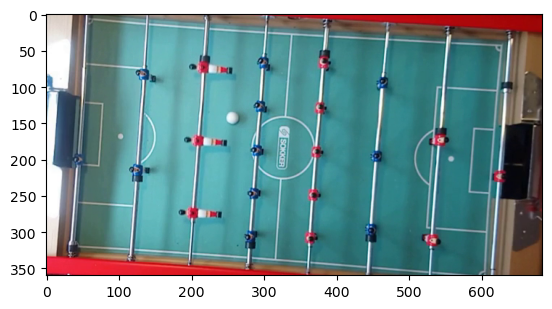

In [2]:
# TODO -- Load the image named ``image1.png`` and display it

%matplotlib inline

# 1. Preparing the file path including the name of the color image and the file format
path_to_images = 'images/' # Directory where the images are stored
image1_path = 'image1.png'

# 2. Loading the color image 
image1 = io.imread(path_to_images + image1_path)

# 3. Preparing a display of the color image to show
plt.imshow(image1)

# 4. Confirming and really showing the prepared display
plt.show()

<font size='5'>&#x26A0;</font> Do not forget to close the plot.

In [3]:
plt.close()

#### <font color="dodgerblue">1.1.2. Convert an RGB color image into a grayscale one</font>

Now that our image is loaded into the memory, we can use the function <font size='2'>⚙</font> [rgb2gray(...)](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgb2gray) to convert it from an ``RGB`` format to a ``Grayscales`` one.

In order to use <font size='2'>⚙</font> [rgb2gray(...)](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgb2gray), we need to import <font size='2'>📚</font> [skimage.color](https://scikit-image.org/docs/stable/api/skimage.color.html) that we will name ``color``.

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Complete the code cell bellow in order to convert our color image into a grayscale one and display it.</font> <font size='5'>🔨</font>**

**<font size='2'>✨</font> <font color='teal'>Variable ready to use:</font>**
- <font color="maroon">image1</font>

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>⭕</font> Importing skimage.color and name it color
2. <font size='2'>⭕</font> Converting the image from RGB to Gray and store it in the variable <font color="maroon">gray1</font> by using <font size='2'>⚙</font> [rgb2gray(...)](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgb2gray)
3. <font size='2'>⭕</font> Using <font size='2'>⚙</font> [imshow(...)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) to prepare a display of the color image to show
4. <font size='2'>⭕</font> Confirming and really showing the prepared display by using the function <font size='2'>⚙</font> [show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) of <font size='2'>📚</font> [pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)


**<font size='2'>✨</font> <font color='teal'>Functions to use:</font>**

Here are some simplified prototypes.

<font size='3'>⚙</font> **[color.rgb2gray(rgb_image)](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgb2gray)**
- **Parameter**
    - rgb_image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)
- **Return**
    - grayscale_image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)

<font size='3'>⚙</font> **[plt.imshow(image)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)**
- **Parameter**
    - image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)

<font size='3'>⚙</font> **plt.show()**
 
Feel free to have a quick look <font size='5'>👀</font> at the official documentations by following this link <font size='2'>🔗</font> [rgb2gray(...)](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgb2gray), this one <font size='2'>🔗</font> [imshow(...)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) and this another one <font size='2'>🔗</font> [show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html).

**<font size='2'>✨</font> <font color='teal'>The output result should be as follows.</font>**

<img src="figs/gray1_gray.png"/>

</div>

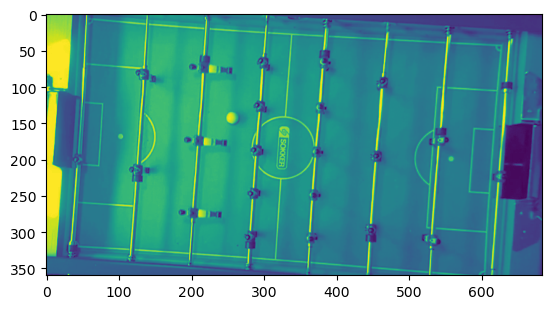

In [8]:
# TODO -- Convert our RGB color image into a grayscale one and display it
%matplotlib inline

# 1. Importing skimage.color and name it color
import skimage.color as color

# 2. Converting the image from RGB to Gray and store it in the variable `gray1`
gray1 = color.rgb2gray(image1)

# 3. Preparing a display of the color image to show
plt.imshow(gray1)

# 4. Confirming and really showing the prepared display
plt.show()


<font size='5'>&#x26A0;</font> Do not forget to close the plot.

In [9]:
plt.close()

### <font color="dodgerblue">1.2. Binarization Thresholding</font>

The most basic method to use for an image segmentation is what we call here [binarization thresholding](http://help.imageanalyst.net/ImageProcessingBasics_Binarization.html).
This method consists of transforming a ``grayscale image`` into a ``binary image`` by turning all pixels having a grayscale value **greater or equal** ``>=`` to a specified ``threshold`` into ``white`` ⬜ and the rest into ``black`` ⬛.

In this example bellow, we can see the result of a ``binarization`` using a ``threshold`` of ``100`` on a ``grayscale image`` encoded in ``uint8`` (or also known as ``ubyte``), i.e. 256 possible values ``[0, 255]``.
We can observe that all pixels having a grayscale value ``>=`` to the specified ``threshold = 100`` are in ``white`` ⬜ in the final binarized image and the rest are ``black`` ⬛.

Notice also that the encoding type ``dtype`` of the binary image here is ``bool`` since there are only two possible values: ``True`` as ``white`` ⬜ and ``False`` as ``black`` ⬛.

<table>
    <tr>
        <td><b>Grayscale image (uint8)</b></td>
        <td><b>Binary image (bool)</b></td>
    </tr>
    <tr>
        <td>
            <table style="border: solid;">
                <tr align="center"">
                    <td style="color: white; background:rgb(100, 100, 100); width: 30px; height: 30px;">100</td>
                    <td style="background:rgb(255, 255, 255); width: 30px; height: 30px;">255</td>
                    <td style="background:rgb(200, 200, 200); width: 30px; height: 30px;">200</td>
                </tr>
                <tr align="center">
                    <td style="color: white; background:rgb(50, 50, 50); width: 30px; height: 30px;">50</td>
                    <td style="color: white; background:rgb(30, 30, 30); width: 30px; height: 30px;">30</td>
                    <td style="background:rgb(208, 208, 208); width: 30px; height: 30px;">208</td>
                </tr>
                <tr align="center">
                    <td style="color: white; background:rgb(10, 10, 10); width: 30px; height: 30px;">10</td>
                    <td style="background:rgb(150, 150, 150); width: 30px; height: 30px;">150</td>
                    <td style="color: white; background:rgb(47, 47, 47); width: 30px; height: 30px;">47</td>
                </tr>
            </table>
        </td>        
        <td>
            <table style="border: solid;">
                <tr align="center">
                    <td style="color: black; background: white; width: 30px; height: 30px;">True</td>
                    <td style="color: black; background: white; width: 30px; height: 30px;">True</td>
                    <td style="color: black; background: white; width: 30px; height: 30px;">True</td>
                </tr>
                <tr align="center">
                    <td style="color: white; background: black; width: 30px; height: 30px;">False</td>
                    <td style="color: white; background: black; width: 30px; height: 30px;">False</td>
                    <td style="color: black; background: white; width: 30px; height: 30px;">True</td>
                </tr>
                <tr align="center">
                    <td style="color: white; background: black; width: 30px; height: 30px;">False</td>
                    <td style="color: black; background: white; width: 30px; height: 30px;">True</td>
                    <td style="color: white; background: black; width: 30px; height: 30px;">False</td>
                </tr>
            </table>
        </td>        
    </tr>
</table>


#### <font color="dodgerblue">1.2.1. Implementing a binariry thresholding function</font>

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Complete the code cell bellow in order to create your thresholding binarization function.</font> <font size='5'>🔨</font>**

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>✅</font> Defining the <font size='2'>⚙</font> <font color="maroon">bin_threshold(...)</font> function
2. <font size='2'>⭕</font> Returning a <font color="maroon">binary image</font> where the pixels of the input grayscale image <font color="maroon">g_img</font> that are **greater or equal** <font color="maroon">>=</font> to the <font color="maroon">threshold</font> parameter are transformed into <font color="maroon">True</font>, i.e. <font color="maroon">white</font> and the remaining will be <font color="maroon">False</font> so <font color="maroon">black</font>
3. <font size='2'>✅</font> Testing if the function is correct


**<font size='2'>✨</font> <font color='teal'>Function to implement:</font>**

Here is the prototype of the desired function.

<font size='3'>⚙</font> **bin_threshold(g_img, threshold)**
- **Parameters**
    - g_img: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (grayscale image to convert)
    - threshold: <font color="maroon">uint8</font> grayscale value used for the binarisation
- **Return**
    - binary_image: <font color="maroon">bool<font color="maroon"> [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)

**<font size='2'>✨</font> <font color='teal'>The output result should be as follows.</font>**

```
array([[ True, False],
       [False,  True]])
```

</div>

In [48]:
# TODO -- Create your thresholding binarization function.

# 1. Defining the `bin_threshold(...)` function
def bin_threshold(g_img, threshold):
    '''
    Transforming a grayscale image into a binary image according to a grayscale threshold.
    g_img: grayscale image to transform
    threshold: grayscale value used during the process
    returns a binary image where the pixels of `g_img >= threshold` will be `True` and the others `False`
    '''
    # 2. Returning the binary image
    row, col = g_img.shape
    result = np.array([[False] * (col) for i in range(row)])

    for i in range(row):
        for j in range(col):
            if g_img[i][j] >= threshold:
                result[i][j] = True
            else:
                result[i][j] = False
    return result

# 3. Testing if the function is correct
img_test = np.array([[5, 3],[1, 7]])
bin_threshold(img_test, threshold=5)

array([[ True, False],
       [False,  True]])

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Test your binary thresholding function on the grayscale image of the example that we saw earlier.</font> <font size='5'>🔨</font>**

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>✅</font> Creating a fake image named <font color="maroon">img_small_example</font> that we use only for the test
2. <font size='2'>⭕</font> Setting the threshold to <font color="maroon">100</font>
3. <font size='2'>⭕</font> Calling the function <font size='2'>⚙</font> <font color="maroon">bin_threshold(...)</font> in order to transform <font color="maroon">img_small_example</font> to a binary image
4. <font size='2'>✅</font> Creating a figure for multiple displays
5. <font size='2'>✅</font> Specifying the number of lines and columns and where to show the first plot
6. <font size='2'>✅</font> Giving a title to the first subplot
7. <font size='2'>⭕</font> Preparing the display for showing the grayscale image <font color="maroon">img_small_example</font>
8. <font size='2'>✅</font> Specifying the number of lines and columns and where to show the second plot
9. <font size='2'>✅</font> Giving a title to the second subplot
10. <font size='2'>⭕</font> Preparing the display for showing the binary image <font color="maroon">binarized</font> by calling the <font size='2'>⚙</font> [imshow(...)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) function
11. <font size='2'>⭕</font> Confirming and showing the figure containing all displays by calling the <font size='2'>⚙</font> [show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html) function

**<font size='2'>✨</font> <font color='teal'>Function to use:</font>**

Here is the protype of the binary thresholding function:

<font size='3'>⚙</font> **bin_threshold(img, threshold)**
- **Parameters**
    - g_img: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (grayscale image to convert)
    - threshold: <font color="maroon">uint8</font> grayscale value used for the binarisation
- **Return**
    - binary_image: <font color="maroon">bool</font> [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)

<font size='3'>⚙</font> **[plt.imshow(image)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)**
- **Parameter**
    - image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)

<font size='3'>⚙</font> **[plt.show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html)**
 
Feel free to have a quick look <font size='5'>👀</font> at the official documentations by following this link <font size='2'>🔗</font> [imshow(...)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) and this another one <font size='2'>🔗</font> [show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html).

**<font size='2'>✨</font> <font color='teal'>The output result should be as follows.</font>**

<img src="figs/binarization_test.png"/>

</div>

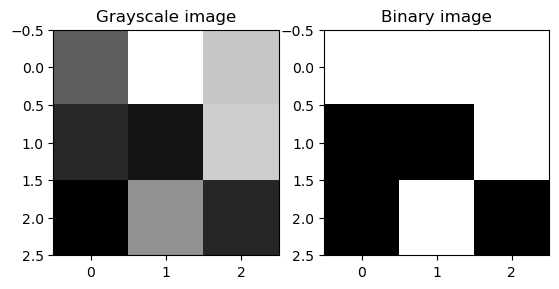

In [35]:
# TODO -- Test your binary thresholding function on the grayscale image of the example that we see earlier.

%matplotlib inline

# 1. Creating a fake image that we use only for the test
img_small_example = np.array([[100, 255, 200],[50, 30, 208],[10, 150, 47]])

# 2. Setting the threshold to 100
threshold = 100

# 3. Calling the function `bin_threshold(...)` in order to transform `img_small_example` to a binary image
binarized = bin_threshold(img_small_example, threshold)

# 4. Creating a figure for multiple displays
plt.figure()

# 5. Specifying the number of lines and columns and where to show the first plot
plt.subplot(1,2,1)

# 6. Giving a title to the first subplot
plt.title("Grayscale image")

# 7. Preparing the display for showing the grayscale image `img_small_example`
plt.imshow(img_small_example, cmap='gray')

# 8. Specifying the number of lines and columns and where to show the second plot
plt.subplot(1,2,2)

# 9. Giving a title to the second subplot
plt.title("Binary image")

# 10. Preparing the display for showing the binary image `binarized`
plt.imshow(binarized, cmap='gray')

# 11. Confirming and showing the figure containing all displays
plt.show()


<font size='5'>&#x26A0;</font> Do not forget to close the plot.

In [36]:
plt.close()

#### <font color="dodgerblue">1.2.2. Binary thresholding on our baby-football image</font>

Now that we understand how to binarize a grayscale image, let's apply this method on our baby-football ``grayscale image`` in order to keep only the information that we need.

In our case, the ideal result would be keeping only the pixels corresponding to the ball. <font size='2'>⚽</font>

<font size='5'>&#x26A0;</font> Having such result could finalize our ball segmentation task **but** as obvious as it seems to be, it is not that straightforward<font size='5'>❗</font>
This may be more daunting than we think so be on your guard. <font size='5'>🛡</font>


<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Complete the code cell bellow in order to binarize our grayscale baby-football image and simplify it.</font> <font size='5'>🔨</font>**

<font size='5'>🏹</font> By binarizing our baby-football grayscale image, we hope to only keep the pixels corresponding to the ball and remove the others.

**<font size='2'>✨</font> <font color='teal'>Variable ready to use:</font>**

- <font color="maroon">gray1</font>: grayscale image of baby-football that we got from one of the previous cells

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>⭕</font> Setting the threshold to <font color="maroon">100</font> (this is not sure to be the good value but let's try it first)
2. <font size='2'>⭕</font> Calling the function <font size='2'>⚙</font> <font color="maroon">bin_threshold(...)</font> in order to transform the baby-football grayscale image <font color="maroon">gray1</font> to a binary image <font color="maroon">babyfoot_binarized</font>
3. <font size='2'>✅</font> Creating a figure for multiple displays
4. <font size='2'>✅</font> Specifying the number of lines and columns and where to show the first plot
5. <font size='2'>✅</font> Giving a title to the first subplot
6. <font size='2'>⭕</font> Preparing the display for showing the grayscale image <font color="maroon">gray1</font>
7. <font size='2'>✅</font> Specifying the number of lines and columns and where to show the second plot
8. <font size='2'>✅</font> Giving a title to the second subplot
9. <font size='2'>⭕</font> Preparing the display for showing the binary image <font color="maroon">babyfoot_binarized</font>  by calling the <font size='2'>⚙</font> [imshow(...)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) function
10. <font size='2'>⭕</font> Confirming and showing the figure containing all displays by calling the <font size='2'>⚙</font> [show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html) function

**<font size='2'>✨</font> <font color='teal'>Function to use:</font>**

Here is the protype of the binary thresholding function:

<font size='3'>⚙</font> **bin_threshold(img, threshold)**
- **Parameters**
    - g_img: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (grayscale image to convert)
    - threshold: <font color="maroon">uint8</font> or <font color="maroon">ubyte</font> grayscale value used for the binarisation
- **Return**
    - binary_image: <font color="maroon">bool</font> [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)

<font size='3'>⚙</font> **[plt.imshow(image)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)**
- **Parameter**
    - image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)

<font size='3'>⚙</font> **[plt.show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html)**
 
Feel free to have a quick look <font size='5'>👀</font> at the official documentations by following this link <font size='2'>🔗</font> [imshow(...)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) and this another one <font size='2'>🔗</font> [show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html).

**<font color="#1E90FF">What result do you get and what do you think about it?</font><font size='5'>❓</font>**

</div>

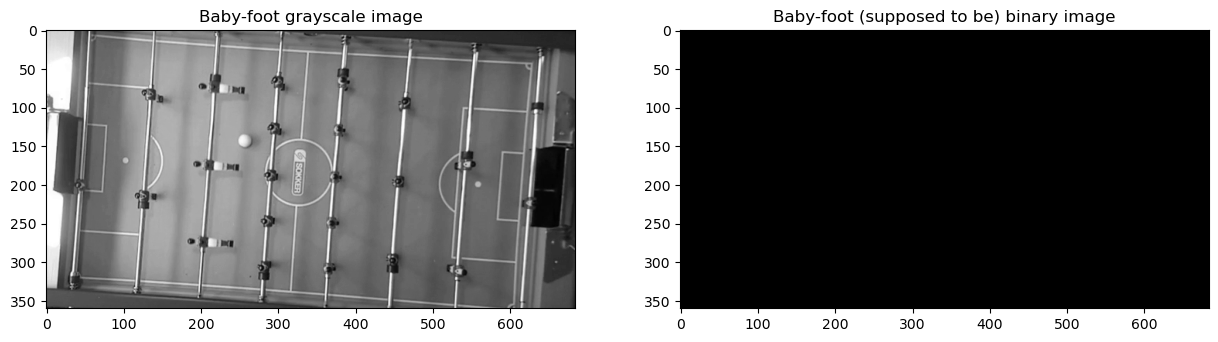

In [37]:
# TODO -- Binarize our grayscale baby-foot image `gray1` and simplify it.

%matplotlib inline

# 1. Setting the threshold to 100 (this is not sure to be the good value but let's try it first)
my_threshold = 100

# 2. Calling the function `bin_threshold(...)` on the grayscale baby-foot image `gray1`
babyfoot_binarized = bin_threshold(gray1, my_threshold)

# 3. Creating a figure for multiple displays
plt.figure(figsize=(15,5))

# 4. Specifying the number of lines and columns and where to show the first plot
plt.subplot(1,2,1)

# 5. Giving a title to the first subplot
plt.title("Baby-foot grayscale image")

# 6. Preparing the display for showing the grayscale image `gray1`
plt.imshow(gray1, cmap='gray')

# 7. Specifying the number of lines and columns and where to show the second plot
plt.subplot(1,2,2)

# 8. Giving a title to the second subplot
plt.title("Baby-foot (supposed to be) binary image")

# 9. Preparing the display for showing the binary image `babyfoot_binarized`
plt.imshow(babyfoot_binarized, cmap='gray')

# 10. Confirming and showing the figure containing all displays
plt.show()


<font size='5'>&#x26A0;</font> Do not forget to close the plot.

In [38]:
plt.close()

<b style="color: gray"> For now, if your result looks like as bellow, <font color="purple">don't worry</font>, this is NORMAL</b>. <font size='5'>👍🏽</font>

<img src='figs/black_result.png'/>

<font color="dodgerblue">**Why do we have such result?**<font color="dodgerblue">  <font size='5'>&#x2753;&#x1F914;</font>

The answer to this question is in the next section bellow. <font size='5'>👇🏽</font>

#### <font color="dodgerblue">1.2.3. Converting dtype format</font>

Let's first see how is the matrix representing the grayscale image `gray1` that we got from the <font size='2'>⚙</font> [rgb2gray(...)](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgb2gray) conversion that we dit earlier.

In [39]:
gray1

array([[0.79374118, 0.7780549 , 0.78197647, ..., 0.06161765, 0.06161765,
        0.06161765],
       [0.80550588, 0.78197647, 0.78981961, ..., 0.08514706, 0.08514706,
        0.08514706],
       [0.80942745, 0.78589804, 0.79374118, ..., 0.095     , 0.095     ,
        0.095     ],
       ...,
       [0.27551843, 0.27944   , 0.27944   , ..., 0.17651333, 0.14712   ,
        0.11966902],
       [0.19750706, 0.2053502 , 0.22887961, ..., 0.1804349 , 0.15218039,
        0.12472941],
       [0.07593843, 0.09162471, 0.12691882, ..., 0.17651333, 0.14825882,
        0.12080784]])

<font size='5'>👀</font> We notice that the values are very different from what we usually have.
Indeed, we expect to have values between `0` and `255` so in range `[0, 255]`.
Instead of that, the values of the pixels appear to be less than `1`. <font size='5'>🤔</font> 

If that is really the case, it is then normal that we only got <font size='2'>⬛</font> black pixels as a result.
Yes, no values are above the threshold value `100` that we chosen.

For a relevant binarization process, we should then chose a value between the minimum pixel value `min` of the grayscale image and its maximum pixel value `max`, i.e. $threshold \in [min, max]$. We can get them by using the methods <font size='2'>⚙</font> {[ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)}.[min()](https://numpy.org/doc/stable/reference/generated/numpy.min.html) and <font size='2'>⚙</font> {[ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)}.[max()](https://numpy.org/doc/stable/reference/generated/numpy.max.html)

If we wish to chose a threshold value between `0` and `255`, the matrix representing our grayscale image should be encoded with a `uint8` dtype.

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Fill the code cell bellow in order to get the minimum and the maximum pixel values of a grayscale image.</font> <font size='5'>🔨</font>**

**<font size='2'>✨</font> <font color='teal'>Variable ready to use:</font>**

- <font color="maroon">gray1</font>: grayscale image of baby-football that we got from one of the previous cells

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>⭕</font> Getting the minimum pixel value
2. <font size='2'>⭕</font> Getting the maximum pixel value
3. <font size='2'>✅</font> Printing the result

**<font size='2'>✨</font> <font color='teal'>Methods to call:</font>**

Many parameters can be used when calling the methods <font size='2'>⚙</font> {[ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)}.[min()](https://numpy.org/doc/stable/reference/generated/numpy.min.html) and <font size='2'>⚙</font> {[ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)}.[max()](https://numpy.org/doc/stable/reference/generated/numpy.max.html) but for now let's only consider the following simplified prototypes.

<font size='3'>⚙</font> **{[ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)}.[min()](https://numpy.org/doc/stable/reference/generated/numpy.min.html)**
- **Return**
    - min: minimum pixel value of the grayscale image
 
<font size='3'>⚙</font> **{[ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)}.[max()](https://numpy.org/doc/stable/reference/generated/numpy.max.html)**
- **Return**
    - max: maximum pixel value of the grayscale image 

<font size='5'>⚠</font> Replace the {[ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)} by an instance of it. For example, if we have a matrix or an image named <font color="maroon">gray_image</font>, we replace {[ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)} by it so we have <font color="maroon">gray_image.min()</font>. Idem for <font size='2'>⚙</font> {[ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)}.[max()](https://numpy.org/doc/stable/reference/generated/numpy.max.html).

Feel free to have a quick look <font size='5'>👀</font> at the official documentation by following this link <font size='2'>🔗</font> {[ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)}.[min()](https://numpy.org/doc/stable/reference/generated/numpy.min.html) and also this one <font size='2'>🔗</font> {[ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)}.[max()](https://numpy.org/doc/stable/reference/generated/numpy.max.html).

**<font size='2'>✨</font> <font color='teal'>The output result should be as follows.</font>**

```
For the image `gray1` we have min: 0.0022619607843137254 and max: 1.0.
```

</div>

In [40]:
# TODO -- Get the minimum and the maximum pixel values of a grayscale image `gray1`.

# 1. Getting the minimum pixel value
pixel_min = gray1.min()

# 2. Getting the maximum pixel value
pixel_max = gray1.max()

# 3. Printing the result
print(f"For the image `gray1` we have min: {pixel_min} and max: {pixel_max}.")

For the image `gray1` we have min: 0.0022619607843137254 and max: 1.0.


Since the `min` is `0.0022619607843137254`and the `max` is `1.0` we should then chose a threshold value in the range `[0.0022619607843137254, 1.0]`.

The code cell bellow also tells us that our grayscale image is encoded with a `float64` which means that there are tons of possible values between the `min` and the `max`. <font size='5'>🙀</font>

In [41]:
gray1.dtype

dtype('float64')

<font color='purple'><b>Don't worry!</b></font> <font size='5'>😉</font>

<font size='5'>💡</font> Fortunately, we can convert our grayscale image `gray1` and get its `uint8` version which suits us since we prefer having values between `0` and `255`, i.e. `[0, 255]`.
This range is designed to be adapted to our human vision. <font size='2'>&#x1F441; 	&#x1F441;</font>

For this conversion, we will need to import the function <font size='2'>⚙</font> [img_as_ubyte(...)](https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.img_as_ubyte) from <font size='2'>📚</font> [skimage](https://scikit-image.org/).
`uint8` is also known as `ubyte`.

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Fill the code cell bellow in order to convert the float64 grayscale image into uint8 (or also known as ubyte).</font> <font size='5'>🔨</font>**

**<font size='2'>✨</font> <font color='teal'>Variable ready to use:</font>**

- <font color="maroon">gray1</font>: grayscale image of baby-football that we got from one of the previous cells

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>⭕</font> Importing the function <font size='2'>⚙</font> [img_as_ubyte(...)](https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.img_as_ubyte) from  <font size='2'>📚</font> [skimage](https://scikit-image.org/)
2. <font size='2'>⭕</font> Converting the **float64** <font color="maroon">gray1</font> into **uint8** <font color="maroon">ubyte_gray1</font> by calling the function <font size='2'>⚙</font> [img_as_ubyte(...)](https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.img_as_ubyte)
3. <font size='2'>✅</font> Showing the result

**<font size='2'>✨</font> <font color='teal'>Function to call:</font>**

Many parameters can be used when calling the methods <font size='2'>⚙</font> [img_as_ubyte(...)](https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.img_as_ubyte) but for now let's only consider the following simplified prototypes.

<font size='3'>⚙</font> **[img_as_ubyte(img)](https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.img_as_ubyte)**
- **Parameters**
    - img: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) representing the image to convert
- **Return**
    - ubyte_image: <font color="maroon">uint8</font> [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) 

Feel free to have a quick look <font size='5'>👀</font> at the official documentation by following this link <font size='2'>🔗</font> [img_as_ubyte(...)](https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.img_as_ubyte).

**<font size='2'>✨</font> <font color='teal'>The output result should be as follows.</font>**

```
array([[202, 198, 199, ...,  16,  16,  16],
       [205, 199, 201, ...,  22,  22,  22],
       [206, 200, 202, ...,  24,  24,  24],
       ...,
       [ 70,  71,  71, ...,  45,  38,  31],
       [ 50,  52,  58, ...,  46,  39,  32],
       [ 19,  23,  32, ...,  45,  38,  31]], dtype=uint8)
```

Don't hesitate to verify the {[ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)}.[min()](https://numpy.org/doc/stable/reference/generated/numpy.min.html) and the {[ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)}.[max()](https://numpy.org/doc/stable/reference/generated/numpy.max.html) if you want. <font size='5'>🔬</font>

</div>

In [43]:
# TODO -- Convert the float64 grayscale image into uint8 (or also known as ubyte).

# 1. Importing the function img_as_ubyte(...) from skimage
from skimage import img_as_ubyte

# 2. Converting the float64 `gray1` to uint8 `ubyte_gray1` by calling the method `img_as_ubyte(...)`
ubyte_gray1 = img_as_ubyte(gray1)

# 3. Showing the result
ubyte_gray1

# 1. Getting the minimum pixel value
pixel_min = ubyte_gray1.min()

# 2. Getting the maximum pixel value
pixel_max = ubyte_gray1.max()

# 3. Printing the result
print(f"For the image `gray1` we have min: {pixel_min} and max: {pixel_max}.")

For the image `gray1` we have min: 1 and max: 255.


#### <font color="dodgerblue">1.2.4. Binarization of the right uint8 grayscale image</font>

Now that we have the correct encoding `uint8`, let's apply the function `bin_threshold(...)`, that we implemented earlier, on it.

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Complete the code cell bellow in order to binarize the uint8 grayscale baby-football image and simplify it.</font> <font size='5'>🔨</font>**

<font size='5'>🏹</font> By binarizing our baby-foot grayscale image, we still hope to only keep the pixels corresponding to the ball and remove the others.

**<font size='2'>✨</font> <font color='teal'>Variable ready to use:</font>**

- <font color="maroon">ubyte_gray1</font>: uint8 grayscale image of baby-foot that we got from one of the previous cells

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>⭕</font> Setting the threshold to <font color="maroon">100</font> (this is not sure to be the good value but let's try it first)
2. <font size='2'>⭕</font> Calling the function <font size='2'>⚙</font> <font color="maroon">bin_threshold(...)</font> in order to transform the baby-foot <font color="maroon">uint8</font> <font color="maroon">grayscale image</font> <font color="maroon">ubyte_gray1</font> to a binary image <font color="maroon">ubyte_babyfoot_binarized</font>
3. <font size='2'>✅</font> Creating a figure for multiple displays
4. <font size='2'>✅</font> Specifying the number of lines and columns and where to show the first plot
5. <font size='2'>✅</font> Giving a title to the first subplot
6. <font size='2'>⭕</font> Preparing the display for showing the grayscale image <font color="maroon">ubyte_gray1</font>
7. <font size='2'>✅</font> Specifying the number of lines and columns and where to show the second plot
8. <font size='2'>✅</font> Giving a title to the second subplot
9. <font size='2'>⭕</font> Preparing the display for showing the binary image <font color="maroon">ubyte_babyfoot_binarized</font> by calling the <font size='2'>⚙</font> [imshow(...)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) function
10. <font size='2'>⭕</font> Confirming and showing the figure containing all displays by calling the <font size='2'>⚙</font> [show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html) function

**<font size='2'>✨</font> <font color='teal'>Function to use:</font>**

Here is the protype of the binary thresholding function:

<font size='3'>⚙</font> **bin_threshold(g_img, threshold)**
- **Parameters**
    - g_img: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (grayscale image to convert)
    - threshold: <font color="maroon">uint8</font> grayscale value used for the binarisation
- **Return**
    - binary_image: <font color="maroon">bool</font> [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)

<font size='3'>⚙</font> **[plt.imshow(image)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)**
- **Parameter**
    - image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)

<font size='3'>⚙</font> **[plt.show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html)**
 
Feel free to have a quick look <font size='5'>👀</font> at the official documentations by following this link <font size='2'>🔗</font> [imshow(...)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) and this another one <font size='2'>🔗</font> [show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html).

**<font color="#1E90FF">What result do you get and what do you think about it?</font><font size='5'>❓</font>**

</div>

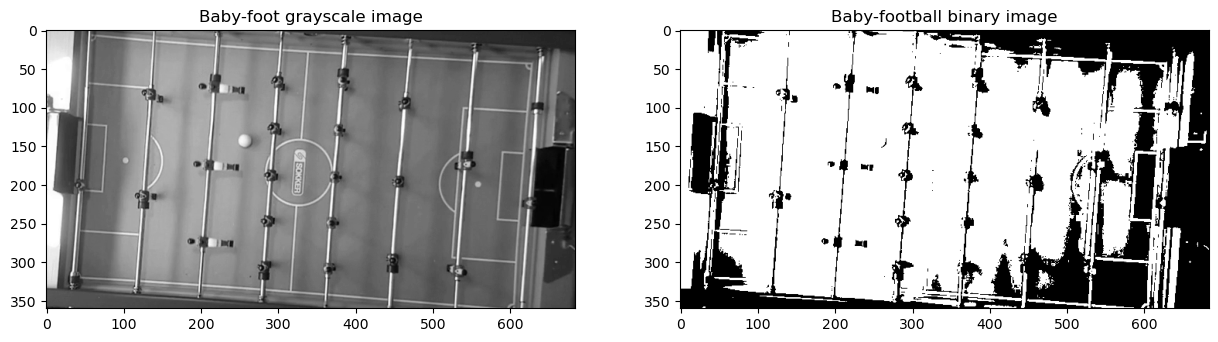

In [46]:
# TODO -- Binarize the uint8 grayscale baby-foot image and simplify it.

# 1. Setting the threshold to 100 (this is not sure to be the good value but let's try it first)
my_threshold = 100

# 2. Calling the function `bin_threshold(...)` on the grayscale baby-foot image `ubyte_gray1`
ubyte_babyfoot_binarized = bin_threshold(ubyte_gray1, my_threshold)

# 3. Creating a figure for multiple displays
plt.figure(figsize=(15,5))

# 4. Specifying the number of lines and columns and where to show the first plot
plt.subplot(1,2,1)

# 5. Giving a title to the first plot
plt.title("Baby-foot grayscale image")

# 6. Preparing the display for showing the grayscale image `ubyte_gray1`
plt.imshow(ubyte_gray1, cmap='gray')

# 7. Specifying the number of lines and columns and where to show the second plot
plt.subplot(1,2,2)

# 8. Giving a title to the second plot
plt.title("Baby-football binary image")

# 9. Preparing the display for showing the binary image `ubyte_babyfoot_binarized`
plt.imshow(ubyte_babyfoot_binarized, cmap='gray')

# 10. Confirming and showing the figure containing all displays
plt.show()


<b style="color: gray"> For now, if your result looks like as bellow, <font color="purple">don't worry</font>, this is also for now NORMAL</b>. <font size='5'>👍🏽</font>

<img src='figs/bin_thres_100.png'/>

##### <font color="dodgerblue">**Why do we have such result?**</font> <font size='5'>&#x2753;&#x1F914;</font>

The ball is white <font color='gray'>(not totally sure)</font> so the values of the pixels forming it should be over `100` but we observe that a lot of pixels of the image seem to be bright enough to be kept in the binarization result. <font size='5'>😮</font>

We have to choose the right threshold value in order to keep only the ball.

However, we can notice that many elements of the image have grayscale intencities that are close to the grayscale intensity of the ball.
This will certainly bring some difficulties to our task but let's first focus on cleaning and simplifying our image.

Having other objects and artifacts is then alright for now as long as we can differentiate the ball from the rest. <font size='5'>👍🏽</font>

### <font color="dodgerblue">1.3. How to choose the optimal threshold?</font> <font size='5'>❓</font>

The first naive approach would be guessing the value of the threshold, test it directly and change it in order to hope to be close to the target. <font size='5'>🏹</font>

Such approach could totally lead to random non reliable results and we do not want that.

Let's see some useful image processing tools that can help us to define the right threshold value with more precision.

#### <font color="dodgerblue">1.3.1. Image histogram</font>

The <font size='5'>📊</font> [image histogram](https://en.wikipedia.org/wiki/Image_histogram) is a tool giving an idea on how the grayscale values are distributed on the image.

It counts the pixels having the same values and groups them in the histogram.

<table>
    <tr>
        <td><b>Image example</b></td>
        <td><b>Image histogram</b></td>
    </tr>
    <tr>
        <td>
            <table style="border: solid;">
                <tr align="center"">
                    <td style="color: white; background:rgb(120, 120, 120); width: 30px; height: 30px;">1</td>
                    <td style="color: white; background:rgb(120, 120, 120); width: 30px; height: 30px;">1</td>
                    <td style="color: white; background:rgb(0, 0, 0); width: 30px; height: 30px;">0</td>
                </tr>
                <tr align="center">
                    <td style="color: black; background:rgb(255, 255, 255); width: 30px; height: 30px;">3</td>
                    <td style="color: white; background:rgb(120, 120, 120); width: 30px; height: 30px;">1</td>
                    <td style="color: white; background:rgb(0, 0, 0); width: 30px; height: 30px;">0</td>
                </tr>
                <tr align="center">
                    <td style="color: black; background:rgb(255, 255, 255); width: 30px; height: 30px;">3</td>
                    <td style="color: white; background:rgb(0, 0, 0); width: 30px; height: 30px;">0</td>
                    <td style="color: white; background:rgb(120, 120, 120); width: 30px; height: 30px;">1</td>
                </tr>
            </table>
        </td>        
        <td>
            <img src="figs/example_histo.png" width=400/>
        </td>        
    </tr>
</table>

We could then see that there are `3` pixels having a value of `0`, `4` pixels of value `1`, `no` pixels of value `2` and `2` pixels of value `3`.

<font size='5'>&#x26A0;</font> Notice on the `x` axis that the minimum pixel value that we call `min_value` is `0`, the maximum pixel value `max_value` is `3` and each value between them could be not associated to a number of pixels.
This is also the case of the pixel value `2` whis is not associated to any pixel.

From the representation of the [image histogram](https://en.wikipedia.org/wiki/Image_histogram), we can have the intuition that if we wish for example to just keep the brightest object which is located at the bottom left of the image, we could then choose a `threshold` above `2` that will remove all the other pixels.

<table>
    <tr>
        <td><b>Binarized image</b></td>
        <td><b>Image histogram and threshold = 2</b></td>
    </tr>
    <tr>
        <td>
            <table style="border: solid;">
                <tr align="center"">
                    <td style="color: white; background:rgb(0, 0, 0); width: 30px; height: 30px;">False</td>
                    <td style="color: white; background:rgb(0, 0, 0); width: 30px; height: 30px;">False</td>
                    <td style="color: white; background:rgb(0, 0, 0); width: 30px; height: 30px;">False</td>
                </tr>
                <tr align="center">
                    <td style="color: black; background:rgb(255, 255, 255); width: 30px; height: 30px;">True</td>
                    <td style="color: white; background:rgb(0, 0, 0); width: 30px; height: 30px;">False</td>
                    <td style="color: white; background:rgb(0, 0, 0); width: 30px; height: 30px;">False</td>
                </tr>
                <tr align="center">
                    <td style="color: black; background:rgb(255, 255, 255); width: 30px; height: 30px;">True</td>
                    <td style="color: white; background:rgb(0, 0, 0); width: 30px; height: 30px;">False</td>
                    <td style="color: white; background:rgb(0, 0, 0); width: 30px; height: 30px;">False</td>
                </tr>
            </table>
        </td>        
        <td>
            <img src="figs/example_histo_thr.png" width=400/>
        </td>        
    </tr>
</table>

<font size='5'>👀</font> As we see on the example above, applying a [binarization thresholding](http://help.imageanalyst.net/ImageProcessingBasics_Binarization.html) on our example image with a <font color='red'>treshold = 2</font> drops all the pixels located on the left side of the dashed red line.
That gives us the result that we want where we only have our object of interest.
This threshold is then optimal for what we wanted to do.

Just for the sake of understanding, take a look at the example bellow <font size='5'>👇🏽</font> which is not the right result if we took a <font color='red'>threshold = 1</font>.

<table>
    <tr>
        <td><b>Binarized image</b></td>
        <td><b>Image histogram and threshold = 1</b></td>
    </tr>
    <tr>
        <td>
            <table style="border: solid;">
                <tr align="center"">
                    <td style="color: black; background:rgb(255, 255, 255); width: 30px; height: 30px;">True</td>
                    <td style="color: black; background:rgb(255, 255, 255); width: 30px; height: 30px;">True</td>
                    <td style="color: white; background:rgb(0, 0, 0); width: 30px; height: 30px;">False</td>
                </tr>
                <tr align="center">
                    <td style="color: black; background:rgb(255, 255, 255); width: 30px; height: 30px;">True</td>
                    <td style="color: black; background:rgb(255, 255, 255); width: 30px; height: 30px;">True</td>
                    <td style="color: white; background:rgb(0, 0, 0); width: 30px; height: 30px;">False</td>
                </tr>
                <tr align="center">
                    <td style="color: black; background:rgb(255, 255, 255); width: 30px; height: 30px;">True</td>
                    <td style="color: white; background:rgb(0, 0, 0); width: 30px; height: 30px;">False</td>
                    <td style="color: black; background:rgb(255, 255, 255); width: 30px; height: 30px;">True</td>
                </tr>
            </table>
        </td>        
        <td>
            <img src="figs/example_histo_thr1.png" width=400/>
        </td>        
    </tr>
</table>

<font size='5'>&#x26A0;</font> The [image histogram](https://en.wikipedia.org/wiki/Image_histogram) is another way of representing an image.
We can see throught it the repartition of the various grayscale intencities of an image, which is interesting and useful <font size="5">👍🏻</font> , **<font color="red">BUT</font>** keep in mind that it does not give information about nor the positions of the pixels in the image nor about the neighbouring. <font size="5">😅</font>

##### <font color="dodgerblue">**Implementation of an image histogram**</font>

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Complete the code cell bellow in order to implement your image histogram function.</font> <font size='5'>🔨</font>**

The values of the histogram are represented by the bars that we saw above but behind, they are stored in an [array](https://www.w3schools.com/Python/python_arrays.asp) where the `indices` corresponds to the possible <font color="maroon">pixel values</font> and the <font color="maroon">cells</font> are the <font color="maroon">number of pixels</font> having each value.

<table>
    <tr>
        <td><b>Pixel values</b></td>
        <td style="width: 30px; height: 30px;" align="center">0</td>
        <td style="width: 30px; height: 30px;" align="center">1</td>
        <td style="width: 30px; height: 30px;" align="center">2</td>
        <td style="width: 30px; height: 30px;" align="center">3</td>
    </tr>
    <tr>
        <td><b>Number of pixels</b></td>
        <td style="width: 30px; height: 30px; border: 1px solid;" align="center">3</td>
        <td style="width: 30px; height: 30px; border: 1px solid;" align="center">4</td>
        <td style="width: 30px; height: 30px; border: 1px solid;" align="center">0</td>
        <td style="width: 30px; height: 30px; border: 1px solid;" align="center">2</td>
    </tr>
</table>

The length of this [array](https://www.w3schools.com/Python/python_arrays.asp) is the number of possible values that a pixel can have.

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>✅</font> Defining the function <font size='2'>⚙</font> <font color='maroon'>histo(...)</font>
2. <font size='2'>⭕</font> Preparing an [array](https://www.w3schools.com/Python/python_arrays.asp) <font color="maroon">h</font> having the right length and initialized by zero (you can use [np.array](https://numpy.org/doc/stable/reference/generated/numpy.array.html))
3. <font size='2'>⭕</font> Getting the number of rows and the number of columns of the image
4. <font size='2'>⭕</font> Counting the pixels and storing in <font color="maroon">h</font> those having the same values by exploring the matrix of the image pixel by pixel
5. <font size='2'>⭕</font> Returning the filled [array](https://www.w3schools.com/Python/python_arrays.asp) <font color="maroon">h</font> which is finally the histogram
6. <font size='2'>✅</font> Testing the <font size='2'>⚙</font> <font color="maroon">histo(...)</font> function on an example named <font color="maroon">img_example</font> where there are <font color="maroon">4</font> possible values of a pixel
7. <font size='2'>✅</font> Showing the result

**<font size='2'>✨</font> <font color='teal'>Function to implement:</font>**

Here is the prototype of the desired function.

<font size='3'>⚙</font> **histo(img, levels)**
- **Parameters**
    - img: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (grayscale image to consider)
    - levels: number of possible values of each pixel
- **Return**
    - h: filled [array](https://www.w3schools.com/Python/python_arrays.asp) which is finally the histogram

**<font size='2'>✨</font> <font color='teal'>The output result should be as follows.</font>**

```
array([3, 4, 0, 2])
```
</br>

or

```
array([3., 4., 0., 2.])
```

Why could we have many possibilities about the form of the result? <font size='5'>🤔</font>

Investigate by yourself! <font size='5'>🔬</font>

</div>

In [63]:
# TODO -- Implement your image histogram function

# 1. Defining the `histo(...)` function
def histo(img, levels):
    '''
    Generating an image histogram.
    img: image to consider
    levels: number of possible values of each pixel
    '''

    # 2. Preparing an array having the right length and initialized by zero (you can use `np.array`)
    h = np.array([0] * levels)

    # 3. Getting the number of rows and the number of columns of the image
    row, col = img.shape

    # 4. Counting the pixels and storing in `h` those having the same values by exploring the matrix of the image pixel by pixel
    for i in range(row):
        for j in range(col):
            h[img[i][j]] += 1

    # 5. Returning the filled array which is finally the histogram
    return h

# 6. Testing the histo(...) function on an example named `img_example` where there are `4` possible values of a pixel
img_example = np.array([[1, 1, 0],[3, 1, 0],[3, 0, 1]])
levels = 4
example_histo = histo(img_example, levels)

# 7. Showing the result
example_histo

array([3, 4, 0, 2])

##### <font color="dodgerblue">**Displaying an image histogram**</font>

Once we got the `array` that we called here `example_histo` representing the histogram of our grayscale image, we would now wish to plot it in a figure.

For this part, we will learn how to plot the histogram by using the function <font size='2'>⚙</font> [bar(...)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) of <font size='2'>📚</font> [pyplot](https://matplotlib.org/stable/tutorials/pyplot.html).

Before calling the function <font size='2'>⚙</font> [bar(...)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) we have first to prepare another `array` containing the value units that will be displayed on the `x` axis.

These units correspond to the possible pixel values and for the example before, we can see that this `array` contains the values in the range `[min_value, max_value]`.

All the values between the  `min_value` and the `max_value` have to be representated altough some of them could be not associated to a number of pixels.
Remember our example case where there is `no` pixel having the value `2`.

For our example, the `x_axis` looks as bellow and the number of possible pixel values is `levels = 4`.
<table>
    <tr>
        <td><b>x_axis</b></td>
        <td style="width: 30px; height: 30px;" align="center">0</td>
        <td style="width: 30px; height: 30px;" align="center">1</td>
        <td style="width: 30px; height: 30px;" align="center">2</td>
        <td style="width: 30px; height: 30px;" align="center">3</td>
    </tr>
</table>

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Fill the cell code bellow in order to prepare the <font color="maroon">x_axis</font> array that we will use later for displaying the histogram.</font> <font size='5'>🔨</font>**

**<font size='2'>✨</font> <font color='teal'>Variable ready to use:</font>**
- <font color="maroon">levels:</font> number of possible pixel values

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>✅</font> Defining the <font color="maroon">levels</font>, i.e. number of the possible grayscale values of each pixel
2. <font size='2'>⭕</font> Using the function <font size='2'>⚙</font> [arange(...)](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) of <font size='2'>📚</font> [numpy](https://numpy.org/) to prepare an [array](https://www.w3schools.com/Python/python_arrays.asp) named <font color="maroon">x_axis</font> containing all possible pixel values that will be displayed on the <font color="maroon">x</font> axis
3. <font size='2'>✅</font> Displaying the result

**<font size='2'>✨</font> <font color='teal'>Function to use:</font>**

Many parameters can be used when calling the function <font size='2'>⚙</font> [arange(...)](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) of <font size='2'>📚</font> [numpy](https://numpy.org/) but for now let's only consider the following simplified prototype.

<font size='3'>⚙</font> **[np.arange(lvl)](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)**
- **Parameter**
    - lvl: number of possible pixel values

Feel free to have a quick look <font size='5'>👀</font> at the official documentation by following this link <font size='2'>🔗</font> [arange(...)](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) of [numpy](https://numpy.org/).

**<font size='2'>✨</font> <font color='teal'>The output result should be as follows.</font>**

```
array([0, 1, 2, 3])
```

</div>

In [55]:
# TODO -- Prepare the `x_axis` array that we will use later  for displaying the image histogram.

# 1. Defining the levels, i.e. possible grayscale values of each pixel
levels = 4 # for our case because we have 0, 1, 2 and 3 as possible values of a pixel

# 2. Calling the function np.arange(...) by considering the `levels` we identified above
x_axis = np.arange(levels)

# 3. Displaying the result
x_axis

array([0, 1, 2, 3])

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Fill the cell code bellow in order to display an image histogram.</font> <font size='5'>🔨</font>**

**<font size='2'>✨</font> <font color='teal'>Variable ready to use:</font>**
- <font color="maroon">img_example:</font> [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) of the grayscale image that we considered earlier
- <font color="maroon">x_axis:</font> [array](https://www.w3schools.com/Python/python_arrays.asp) containing all possible values of a pixel to represent on the <font color="maroon">x</font> axis
- <font color="maroon">example_histo:</font> [array](https://www.w3schools.com/Python/python_arrays.asp) corresponding to the histogram of the image to consider

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>✅</font> Creating a figure for multiple displays
2. <font size='2'>✅</font> Specifying the number of lines and columns and where to show the first plot
3. <font size='2'>✅</font> Giving a title to the first subplot
4. <font size='2'>⭕</font> Preparing the display for showing the grayscale image <font color="maroon">img_example</font>
5. <font size='2'>✅</font> Specifying the number of lines and columns and where to show the second plot
6. <font size='2'>✅</font> Giving a title to the second subplot
7. <font size='2'>⭕</font> Preparing the display of the bar showing the histogram <font color="maroon">example_histo</font> considering the <font color="maroon">x_axis</font> prepared earlier and <font color="maroon">label="Histogram"</font>
8. <font size='2'>✅</font> Specifying the labels to give to the <font color="maroon">x</font> axis and the label to give to the <font color="maroon">y</font> axis
9. <font size='2'>✅</font> Applying all the legends, i.e. showing the specified <font color="maroon">label="Histogram"</font> precised while calling the function <font color="maroon">plt.bar(...)</font>
10. <font size='2'>⭕</font> Confirming and showing the figure containing all displays

**<font size='2'>✨</font> <font color='teal'>Function to use:</font>**

Many parameters can be used when calling the function  <font size='2'>⚙</font> [bar(...)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) but for now let's only consider the following simplified prototype.

<font size='3'>⚙</font> **[plt.bar(x_axis, histo, label)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)**
- **Parameter**
    - x_axis: [array](https://www.w3schools.com/Python/python_arrays.asp) containing each possible value of a pixel to represent on the <font color="maroon">x</font> axis
    - histo: [array](https://www.w3schools.com/Python/python_arrays.asp) representing the histogram to show
    - label: [str](https://docs.python.org/3/library/string.html) displayed a legend

<font size='3'>⚙</font> **[plt.imshow(image)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)**
- **Parameter**
    - image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)

<font size='3'>⚙</font> **[plt.show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html)**
 
Feel free to have a quick look <font size='5'>👀</font> at the official documentations by following this link <font size='2'>🔗</font> [bar(...)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html), this one <font size='2'>🔗</font> [imshow(...)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) and this another one <font size='2'>🔗</font> [show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html).

**<font size='2'>✨</font> <font color='teal'>The output result should be as follows.</font>**

<img src="figs/example_gray_histo.png"/>

</div>

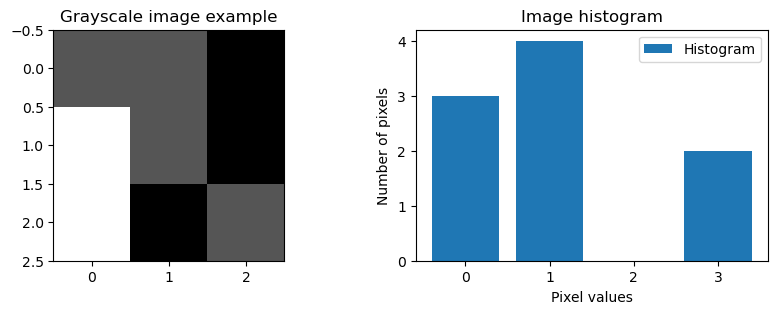

In [65]:
# TODO -- Display an image histogram

%matplotlib inline

# 1. Creating a figure for multiple displays
plt.figure(figsize=(10,3))

# 2. Specifying the number of lines and columns and where to show the first plot
plt.subplot(121)

# 3. Giving a title to the first subplot
plt.title("Grayscale image example")

# 4. Preparing the display for showing the grayscale image `img_example`
plt.imshow(img_example, cmap='gray')

# 5. Specifying the number of lines and columns and where to show the second plot
plt.subplot(122)

# 6. Giving a title to the second subplot
plt.title("Image histogram")

# 7. Preparing the display of the bar showing the histogram `example_histo` considering the `x_axis` prepared earlier and `label="Histogram"`
plt.bar(x_axis, example_histo, label='Histogram')

# 8. Specifying the labels to give to the `x` axis and the label to give to the `y` axis
plt.xlabel("Pixel values")
plt.ylabel("Number of pixels")

# 9. Applying all the legends, i.e. showing the specified `label="Histogram"` precised while calling the function `plt.bar(...)`
plt.legend()

# 10. Confirming and showing the figure containing all displays
plt.show()


<font size='5'>&#x26A0;</font> Do not forget to close the plot.

In [66]:
plt.close()

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Fill the cell code bellow in order to get the image histogram of our previous baby-football grayscale image.</font> <font size='5'>🔨</font>**

**<font size='2'>✨</font> <font color='teal'>Variable ready to use:</font>**
- <font color="maroon">ubyte_gray1:</font> [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) of the baby-football <font color="maroon">ubyte</font> grayscale image we got earlier

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>⭕</font> Specifying the possible number of pixel values, remember that our grayscale image <font color="maroon">ubyte_gray1</font> is encoded as <font color="maroon">ubyte</font>, i.e. <font color="maroon">uint8</font>
2. Calling the function <font size='2'>⚙</font> <font color="maroon">histo(...)</font> on our previous grayscale image <font color="maroon">ubyte_gray1</font>
3. <font size='2'>✅</font> Displaying the result

**<font size='2'>✨</font> <font color='teal'>Function to use:</font>**

<font size='3'>⚙</font> **histo(img, levels)**
- **Parameters**
    - img: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (grayscale image to consider)
    - levels: number of possible values of each pixel
- **Return**
    - h: filled [array](https://www.w3schools.com/Python/python_arrays.asp) which is finally the histogram

**<font size='2'>✨</font> <font color='teal'>The output result should be as follows.</font>**

<img src="figs/real_histo.png"/>

</div>

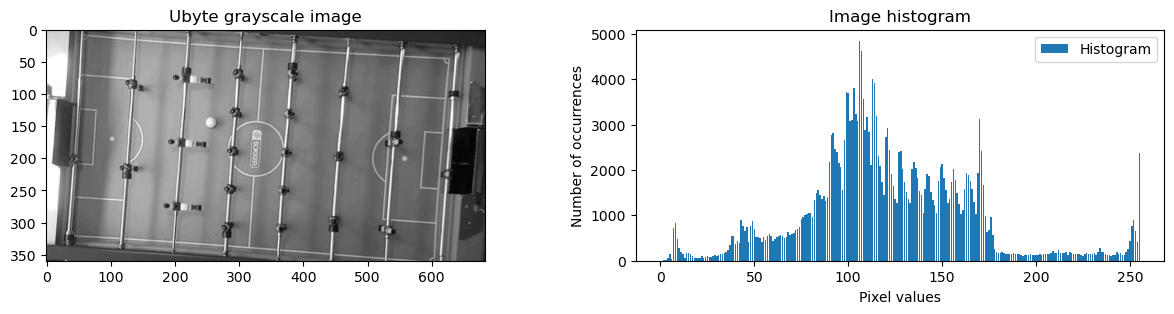

In [67]:
%matplotlib inline

# 1. Specifying the possible number pixel values
gray_levels = 256

# 2. Calling the function `histo(...)` on our previous grayscale image `ubyte_gray1`
image_histo = histo(ubyte_gray1, gray_levels)

# 3. Displaying the result
plt.figure(figsize=(15,3))
plt.subplot(121)
plt.title("Ubyte grayscale image")
plt.imshow(ubyte_gray1, cmap='gray')
plt.subplot(122)
plt.title("Image histogram")
plt.bar(np.arange(gray_levels), image_histo, label="Histogram")
plt.xlabel("Pixel values")
plt.ylabel("Number of occurrences")
plt.legend()
plt.show()

<font size='5'>&#x26A0;</font> Do not forget to close the plot.

In [68]:
plt.close()

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- What is the optimal threshold for our ball detection <font size="5">❓</font> </font> <font size='5'>🔬</font>**

Now that we understand what an [image histogram](https://en.wikipedia.org/wiki/Image_histogram) is, run the cell code bollow and play with the slider <font size='5'>&#x1F42D;🖱</font> in order to find the most suitable <font color="maroon">threshold</font> for our case, i.e. highlighting the <font color="maroon">ball</font>.

Be aware that other objects contained in the image could have pixels having the same grayscale intencities as the pixels of our <font color="maroon">object of interest</font> which is the <font color="maroon">ball</font>.

<font size="5">⚠</font> For our first step of segmentation, having a result including artefacts or unwanted objects is not a fail but a big <font size="5">👣</font> step further as long as the <font size='2'>⚽</font> ball is visible and could be recognized later <font size="5">❗</font>

Indeed, as long as our <font color="maroon">object of interest</font>, i.e. the <font color="maroon">ball</font>, is **visible** and **well seperated** from the rest, there could be hope to extract it later. <font size="5">👍🏽</font>

</div>

In [69]:
g_img = ubyte_gray1
%run functions/hist_bin_slider.ipynb

interactive(children=(FloatSlider(value=100.0, continuous_update=False, description='Threshold', max=255.0, st…

<font size='5'>&#x26A0;</font> Do not forget to close the plot.

In [70]:
plt.close()

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Do a binary thresolding on our grayscale image using your chosen threshold.<font size='5'>🔨</font>**

**<font size='2'>✨</font> <font color='teal'>Variable ready to use:</font>**
- <font color="maroon">ubyte_gray1:</font> [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) of the baby-football <font color="maroon">ubyte</font> grayscale image we got earlier

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>⭕</font> Specifying the threshold
2. <font size='2'>⭕</font> Applying the binarization function <font size='2'>⚙</font> <font color="maroon">bin_threshold(...)</font> on the image <font color="maroon">ubyte_gray1</font>
3. <font size='2'>⭕</font> Displaying the resulting image

**<font size='2'>✨</font> <font color='teal'>Function to use:</font>**

Here is the protype of the binary thresholding function:

<font size='3'>⚙</font> **bin_threshold(g_img, threshold)**
- **Parameters**
    - g_img: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (grayscale image to convert)
    - threshold: <font color="maroon">uint8</font> grayscale value used for the binarisation
- **Return**
    - binary_image: <font color="maroon">bool</font> [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)

<font size='3'>⚙</font> **[plt.imshow(image)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)**
- **Parameter**
    - image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)

<font size='3'>⚙</font> **[plt.show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html)**
 
Feel free to have a quick look <font size='5'>👀</font> at the official documentations by following this link <font size='2'>🔗</font> [imshow(...)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) and this another one <font size='2'>🔗</font> [show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html).

**<font size='2'>✨</font> <font color='teal'>The output result should be as follows.</font>**

<img src="figs/bin_180_res.png"/>

</div>

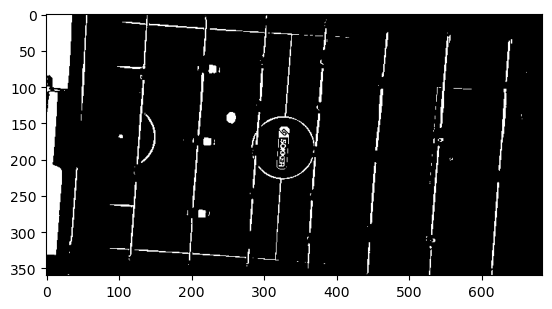

In [74]:
# TODO -- Binary thresolding on our grayscale image `ubyte_gray1` using your chosen threshold

%matplotlib inline

# 1. Specifying the threshold
th = 185

# 2. Applying the binarization function `bin_threshold(...)` on the image `ubyte_gray1`
bin_res1 = bin_threshold(ubyte_gray1, th)

# 3. Displaying the result
plt.imshow(bin_res1, cmap='gray')
plt.show()


<font size='5'>&#x26A0;</font> Do not forget to close the plot.

In [75]:
plt.close()

#### <font color="dodgerblue">1.3.2. Profile of a grayscale image</font>

Remember about the `mountains` and the `valleys`? <font size="5">🏔⛰🌋</font>

In [84]:
grayscale_image = ubyte_gray1
%run functions/draw_profile.ipynb

interactive(children=(FloatSlider(value=143.0, continuous_update=False, description='Line position', max=359.0…

<font size='5'>&#x26A0;</font> Do not forget to close the plot.

In [85]:
plt.close()

<font size='5'>💡</font> We can think that the mountain located between the columns ``200`` and ``300`` of the image is probably the ball of the bafy-football. <font size='5'>⚽</font>

The peak of this mountain which is almost white, i.e. near ``255``, is possibly the center of the ball and its countour should be around <font color='purple'>**180**</font>.

We already saw that before. <font size='5'>😆</font>

### <font color="dodgerblue">1.4. Automatic Thresholding</font>

We admit that it is not easy to find the threshold value manually. <font size='5'>😅</font>

Methods like [Otsu](https://en.wikipedia.org/wiki/Otsu%27s_method) are there to help you to find this threshhold automatically.
The algorithm is designed to return a single intensity threshold that allows us to separate the foreground from the background.

We are not going to see what does this algorithm in details behind but feel free to check it by yourself by following this link <font size='2'>🔗</font> [Otsu](https://en.wikipedia.org/wiki/Otsu%27s_method). <font size='5'>🔎</font>

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Get a threshold automatically by using Otsu and use it for a binarization.<font size='5'>🔨</font>**

**<font size='2'>✨</font> <font color='teal'>Variable ready to use:</font>**
- <font color="maroon">ubyte_gray1:</font> [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) of the baby-football <font color="maroon">ubyte</font> grayscale image we got earlier

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>⭕</font> Importing <font color='maroon'>threshold_otsu</font> from the <font color='maroon'>skimage.filters</font>
2. <font size='2'>⭕</font> Getting the threshold by calling <font size='2'>⚙</font> <font color='maroon'>threshold_otsu(...)</font> on our image <font color='maroon'>ubyte_gray1</font>
3. <font size='2'>⭕</font> Applying a binary thresholding on our image <font color='maroon'>ubyte_gray1</font> by calling <font size='2'>⚙</font> <font color='maroon'>bin_threshold(...)</font> and considering the threshold <font color='maroon'>th_otsu</font>
4. <font size='2'>⭕</font> Displaying the resulting image

**<font size='2'>✨</font> <font color='teal'>Functions to use:</font>**

Here are the simplified protype of the functions:

<font size='3'>⚙</font> **[threshold_otsu(g_img)](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.threshold_otsu)**
- **Parameters**
    - g_img: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (grayscale image to consider)
- **Return**
    - threshold: a single intensity threshold that allows us to separate the foreground from the background
 
<font size='3'>⚙</font> **bin_threshold(g_img, threshold)**
- **Parameters**
    - g_img: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (grayscale image to convert)
    - threshold: <font color="maroon">uint8</font> grayscale value used for the binarisation
- **Return**
    - binary_image: <font color="maroon">bool</font> [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)
 
<font size='3'>⚙</font> **[plt.imshow(image)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)**
- **Parameter**
    - image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)

<font size='3'>⚙</font> **[plt.show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html)**

Feel free to have a quick look <font size='5'>👀</font> at the official documentations by following this link <font size='2'>🔗</font> [threshold_otsu(...)](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.threshold_otsu), this one <font size='2'>🔗</font> [imshow(...)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) and this another one <font size='2'>🔗</font> [show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html).

**<font color="#1E90FF">What result do you get and what do you think about it</font><font size='5'>❓🤔</font>**

</div>

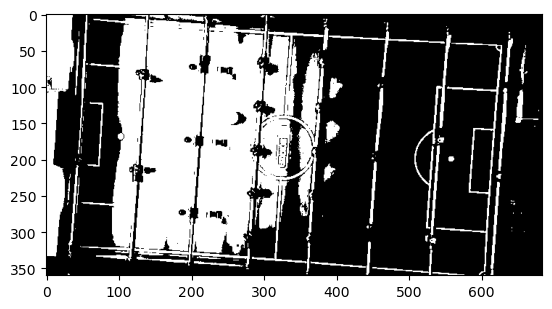

In [87]:
# TODO -- Get a threshold automatically by using Otsu and use it for a binarization

%matplotlib inline

# 1. Importing `threshold_otsu` from `skimage.filters`
from skimage.filters import threshold_otsu

# 2. Getting the threshold by calling `threshold_otsu(...)` on our image `ubyte_gray1`
th_otsu = threshold_otsu(ubyte_gray1)

# 4. Applying a binary thresholding on our image `ubyte_gray1` by calling `bin_threshold(...)` and considering the threshold `th_otsu`
otsu1 = bin_threshold(ubyte_gray1, th_otsu)

# 5. Displaying resulting image as your learning with `imshow(...)` and `show(...)`
plt.imshow(otsu1, cmap='gray')
plt.show()

<font size='5'>&#x26A0;</font> Do not forget to close the plot.

In [88]:
plt.close()

This result does not seem to be convincing. <font size='5'>😅</font>
The ball <font size='2'>⚽</font> is not visible at all.

In fact, this is really far from what we expected for our ball detection problematic.

There are many other methods proposing an automated threshold.
Execute the code cell bellow and let's see if we can find something interesting for our case. <font size='5'>🔎</font>

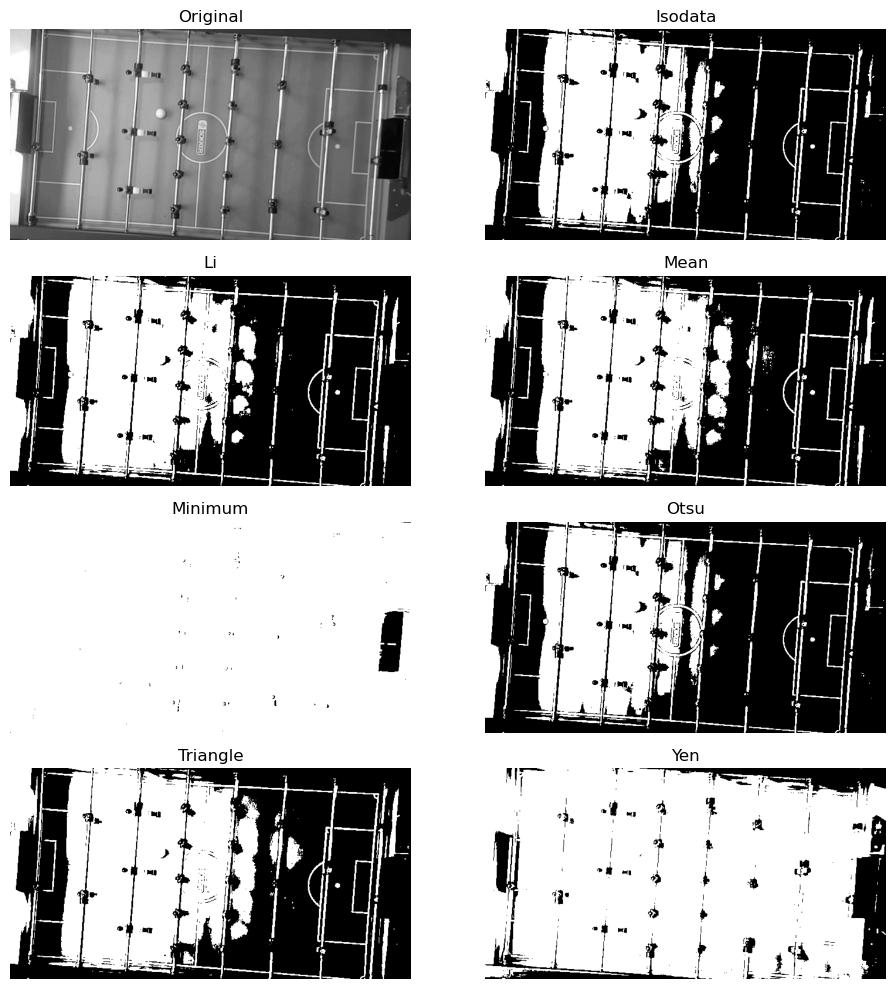

In [89]:
%matplotlib inline
skimage.filters.try_all_threshold(ubyte_gray1,figsize=(10,10),verbose=False)
plt.show()

<font size='5'>&#x26A0;</font> Do not forget to close the plot.

In [90]:
plt.close()

Nothing intresting for us now but certainly for later. <font size='5'>😉</font>

## <font color="dodgerblue">2. Video binarization</font> <font size='5'>🎥</font>

Let's use what we have learned on a video and get a simplified version of it by doing a [binarization](http://help.imageanalyst.net/ImageProcessingBasics_Binarization.html) on each frame.
Remember, that this step helps us to drop all useless information and only keep as small data as we can while ensuring that the ball <font size='2'>⚽</font> stays visible enough to be detected and to be tracked later.

### <font color="dodgerblue">2.1. Binarization function</font>

We have first to transform our pipeline into a function that we will name <font color='maroon'>image_processing_v1(...)</font> so we can apply it to each frame of our video.
In order to achieve our goal of **baby-football detection and tracking**, we will have to update this function <font color='maroon'>step by step</font>. <font size='2'>👣</font> <font size='3'>👣</font> <font size='5'>👣</font>

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Fill the cell code bellow in order to create a function that will be used to treat each frame of our video.<font size='5'>🔨</font>**

Use what we have learned from the previous exercises to fulfil this task.

**<font size='2'>✨</font> <font color='teal'>Variable ready to use:</font>**
- <font color="maroon">image1:</font> color image to consider

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>✅</font> Importing the required python modules
2. <font size='2'>⭕</font> Defining the function according to the prototype
3. <font size='2'>⭕</font> Transforming the RGB color image <font color='maroon'>image</font> into a grayscale image
4. <font size='2'>⭕</font> Transforming the grayscale image so we get values in <font color='maroon'>[0, 255]</font>
5. <font size='2'>⭕</font> Binarizing the ubyte grayscale image by using the <font color='maroon'>threshold</font> parameter
6. <font size='2'>⭕</font> Returning the binarized result
7. <font size='2'>✅</font> Testing the function and showing the result

**<font size='2'>✨</font> <font color='teal'>Prototype of the function to implement:</font>**

<font size='3'>⚙</font> **image_processing_v1(image, threshold)**
- **Parameters**
    - image: rgb color image to treat
    - threshold: <font color="maroon">uint8</font> grayscale value used for the binarisation, the value should be in <font color='maroon'>[0, 255]</font>
- **Return**
    - binary_image: <font color="maroon">bool</font> [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) simplified binary image

**<font size='2'>✨</font> <font color='teal'>Functions to use:</font>**

Here are the simplyfied protypes to consider:

<font size='3'>⚙</font> **[color.rgb2gray(rgb_image)](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgb2gray)**
- **Parameter**
    - rgb_image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)
- **Return**
    - grayscale_image: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)
 
<font size='3'>⚙</font> **[img_as_ubyte(img)](https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.img_as_ubyte)**
- **Parameters**
    - img: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) representing the image to convert
- **Return**
    - ubyte_image: <font color="maroon">uint8</font> [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) 

<font size='3'>⚙</font> **bin_threshold(g_img, threshold)**
- **Parameters**
    - g_img: [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) (grayscale image to convert)
    - threshold: <font color="maroon">uint8</font> grayscale value used for the binarisation
- **Return**
    - binary_image: <font color="maroon">bool</font> [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html)
 
Feel free to have a quick look <font size='5'>👀</font> at the official documentations by following this link <font size='2'>🔗</font> [color.rgb2gray(rgb_image)](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgb2gray) and this another one <font size='2'>🔗</font> [img_as_ubyte(img)](https://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.img_as_ubyte).

**<font size='2'>✨</font> <font color='teal'>The output result should be as follows.</font>**

<img src="figs/bin_180_res.png"/>

</div>

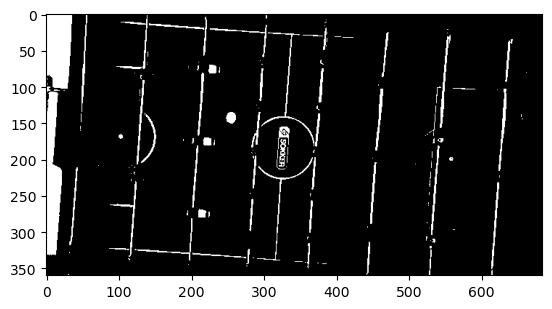

In [91]:
# TODO -- Create a function that will be used to treat each frame of our video.

# 1. Importing the required python modules
import skimage.color as color
from skimage import img_as_ubyte

# 2. Defining the function according to the prototype
def image_processing_v1(img, th):

    # 3. Transforming the RGB color image 'image' into a grayscale image
    grayscale = color.rgb2gray(img)

    # 4. Transforming the grayscale image so we get values in `[0, 255]`
    ubyte_gray = img_as_ubyte(grayscale)

    # 5. Binarizing the ubyte grayscale by using the 'threshold' parameter
    binary = bin_threshold(ubyte_gray, th)

    # 6. Returning the binarized result
    return binary

# 7. Testing the function and showing the result
threshold = 180
binarized1 = image_processing_v1(image1, threshold)

%matplotlib inline
plt.imshow(binarized1, cmap='gray')
plt.show()

<font size='5'>&#x26A0;</font> Do not forget to close the plot.

In [92]:
plt.close()

### <font color="dodgerblue">2.2. Video binarization and vizualization</font>

We saw previously that a video is a time sequence of images that we call frames.
We can then think of a video binarization as a succession of binarization processes applied on each frame of the video.

#### <font color="dodgerblue">2.2.1. Image processing on each video frame</font>

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Fill the cell code bellow in order to apply our image processing function on each frame of a video.</font> <font size='5'>🔨</font>**

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>✅</font> Loading and getting the video frames
2. <font size='2'>⭕</font> Specifying an optimal threshold
3. <font size='2'>⭕</font> Calling the function [treat_video(...)](functions/treat_video.html) to apply a binarization image processing on each frames of <font color='maroon'>video_frames</font>
4. <font size='2'>✅</font> Showing the length of the list containing the binary images result

**<font size='2'>✨</font> <font color='teal'>Function to call:</font>**

Here is the prototype of the function to use.

<font size='3'>⚙</font> **[treat_video(video_frames, threshold, our_func)](functions/treat_video.html)**
- **Parameters**
    - video_frames: sequence of frames to read. Each frame is an image so this is a <font color="maroon">list</font> of images.
    - threshold: grayscale value in <font color='maroon'>[0, 255]</font> to use for the binarization process.
    - our_func: a function that will be called for each frame of the video. This function is meant to gather a set of image processing tasks.
- **Return**
    - <font color='maroon'>treated_frames</font>: list of images corresponding to the results

**<font size='2'>✨</font> <font color='teal'>The output result should be as follows:</font>**

```
165
```

<br/> This result corresponds to the number of treated images.

</div>

In [102]:
# TODO -- Apply a binarization process on each frame of a video

# 1. Loading and getting the video frames
video_frames = get_video_frames_from('videos/video_1_360.mp4')

# 2. Specifying an optimal threshold
threshold = 180

# 3. Calling the function 'treat_video(...)' to apply a binarization image processing on each frames of 'video_frames'
video_result = treat_video(video_frames, threshold, image_processing_v1)

# 4. Showing the length of the array containing the binary images result
len(video_result)

165

#### <font color="dodgerblue">2.2.2. Time cost</font> <font size='5'>⌛ 💵</font>

We now have a result of our video processing that we can display later but before that, it is important to know how much time did it cost to us. <font size='4'>⏱</font>

Indeed, if our video processing task takes too much time to compute, it could be frustrating to wait for the result. <font size='5'>😫</font>

If our <font color='maroon'>image_processing_v1(...)</font> function requires too much time to execute on one image, this could be a serious issue.

We will not pretend to achieve a real time application yet but we would like to reduce the computational time as much as we can.

The choice of image processing tools will then be limited for us since some of them will be expensive in terms of excecution. <font size='5'>🤔</font>

In order to get the time cost of a python instruction, we can be helped by [%timeit](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit) which is a <font size='2'>✨</font>[magic function](https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magic-functions).

We can also use [%%timeit](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit) if we want to check the time execution af a whole cell code.

Feel free to follow this link <font size='2'>🔗</font> [magic function](https://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magic-functions) if you want to know more about magics. <font size='5'>🔬</font>

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Fill the cell code bellow in order to get the time cost of our video treatment.</font> <font size='5'>🔨</font>**

**<font size='2'>✨</font> <font color='teal'>Variable ready to use:</font>**

- <font color="maroon">threshold</font>
- <font color="maroon">video_frames</font>

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>⭕</font> Calling the function [treat_video(...)](functions/treat_video.html) while using the [%timeit](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit) magic function

**<font size='2'>✨</font> <font color='teal'>Function to call:</font>**

Here is the prototype of the function to use.

<font size='3'>⚙</font> **[treat_video(video_frames, threshold, our_func)](functions/treat_video.html)**
- **Parameters**
    - video_frames: sequence of frames to read. Each frame is an image so this is a <font color="maroon">list</font> of images.
    - threshold: grayscale value in <font color='maroon'>[0, 255]</font> to use for the binarization process.
    - our_func: a function that will be called for each frame of the video. This function is meant to gather a set of image processing tasks.
- **Return**
    - <font color='maroon'>treated_frames</font> a list of images corresponding to the results

**<font size='2'>✨</font> <font color='teal'>The output result should be similar (but not totally) as follows:</font>**

```
1.07 s ± 128 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
```

<br/> What can we say about this result?

</div>

In [ ]:
# TODO -- Get the time cost of our video treatment.

# 1. Calling the function 'treat_video(...)' while using the '%timeit' magic function
%timeit treat_video(video_frames, threshold, our_func)

<font size='5'>&#x26A0;</font> Notice that the time cost is here the mean of many runs, which means that our function has been called few times in order to have a more precise cost estimation.

#### <font color="dodgerblue">2.2.3. Display of the video binarization</font>

Let's now show and enjoy the result. <font size='5'>📺</font>

<div style="padding : 20px; background-color:#E6E6FA;">

##### **<font color="#1E90FF">TODO <font size='5'>🔻</font> -- Fill the cell code bellow in order to play the video binarized result.</font> <font size='5'>🔨</font>**

**<font size='2'>✨</font> <font color='teal'>Variable ready to use:</font>**

- <font color="maroon">video_result</font>

**<font size='2'>✨</font> <font color='teal'>The steps to follow are:</font>**

1. <font size='2'>⭕</font> Choosing an interval (in ms) between each frame display
2. <font size='2'>⭕</font> Displaying the video <font color='maroon'>video_result</font> by calling the function [play_video(...)](functions/play_video.html)

**<font size='2'>✨</font> <font color='teal'>Function to call:</font>**

<font size='3'>⚙</font> **[play_video(video_frames, interval, show_axis='on')](functions/play_video.html)**
- **Parameters**
    - video_frames: sequence of frames to read. Each frame is an image so this is a <font color="maroon">list</font> of images.
    - interval: time in millisecond (ms) between two frames.
    - show_axis: <font color="maroon">'on'</font> to show axis values, <font color="maroon">'off'</font> to hide them. Notice that this is not mandatory and it is set to <font color="maroon">'on'</font> by default.

**<font size='2'>✨</font> <font color='teal'>Output result:</font>**

You should see your resulting video displayed.

<font size='5'>⚠</font> Feel free to change the value of the <font color="maroon">interval</font> and experiment the changes and perhaps slow motions. <font size='5'>🐌</font>

</div>

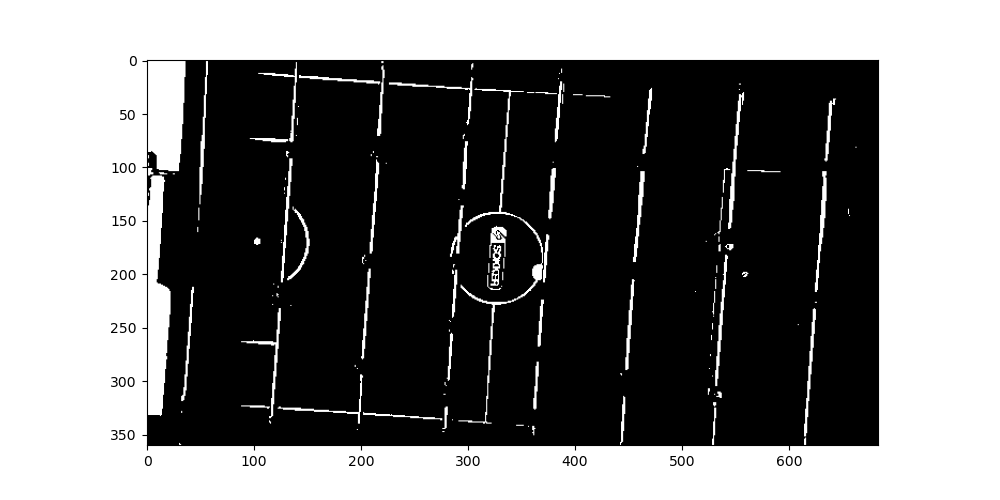

In [111]:
# TODO -- Play the result of the video binarization

%matplotlib widget 

# 1. Choosing an interval (in ms) between each frame display
interval = 5

# 2. Displaying the video 'video_result' by calling the function 'play_video(...)'
play_video(video_result, interval, show_axis='on')


<font size='5'>&#x26A0;</font> Do not forget to close the plot.

In [110]:
plt.close()

Yeah!!! The result looks cool! <font size='5'>😎🍷</font>

**But wait, what happened before the end of the video?** <font size='5'>🤔</font>

###### <font color='green'>Correction</font>

``The ball disappears before reaching the left goal cage!``

Play the video again, in slow motion <font size='5'>🐌</font> if needed, and try to notice what happened. <font size='5'>🔬</font>

We will try to figure out how to avoid what happened but for now...

<font color="purple">**축하해요**</font> <font size='5'>❗🎉</font> 

You reached the end of this notebook and implemented the image processing pipeline bellow. <font size='5'>🥈</font>

## <font color="dodgerblue">Implemented pipeline</font>

<font size='4'>✅</font> **image_processing_<span style='color: white; background-color:  #3498db; padding: 2px;'><b>v1</b></span>**
* <font color="dodgerblue">**Preprocessing**</font>
    - <span style='color: white; background-color:  #3498db; padding: 2px;'><b>v1</b></span> RGB image to grayscale image transformation
    - <span style='color: white; background-color:  #3498db; padding: 2px;'><b>v1</b></span> Grayscale image to ubyte image so we get values in <font color='maroon'>[0, 255]</font>
* <font color="dodgerblue">**Segmentation**</font>
    - <span style='color: white; background-color:  #3498db; padding: 2px;'><b>v1</b></span> Binarization using a manual threshold